In [2]:
from utils.preprocessing import Preprocessor
from utils.utils import create_split
import xgboost as xgb
import pandas as pd
from Validation.Validation import doFullValidation

In [3]:
# Load and split data

# TODO: automatically create or load depending if pkl format exists
# Add output pickle file to data folder
#
d = Preprocessor.loadNtuple("test.pkl")
X_train, y_train, X_test, y_test = create_split(d)

In [4]:
# Hyperparameter Search

# TODO: optional
regressor=xgb.XGBRegressor(eval_metric='rmsle')
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
#search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

#print("The best hyperparameters are ",search.best_params_)

In [5]:
# Create Model

#  TODO: store externally
settings = {"learning_rate":0.005,
           "n_estimators":1700,
           "max_depth":3,
           "eval_metric":'rmse'}

regressor=xgb.XGBRegressor(learning_rate = settings["learning_rate"],
                           n_estimators  = settings["n_estimators"],
                           max_depth     = settings["max_depth"],
                           eval_metric = settings["eval_metric"])

In [6]:
# Train
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [7]:
# Predict
predictions = regressor.predict(X_test)

In [8]:
y_test

120    140.513367
29     471.006042
148    450.055939
65     421.733643
78     243.323013
181    225.549454
20      71.651138
47     488.104706
101    263.284363
76     386.261932
102    364.215851
90     348.277802
105    491.656097
96     382.019287
75     394.015503
185    505.615601
0      216.257278
44     153.023590
87      96.820015
79     190.184738
159    127.533600
171     66.712105
42     126.163948
35     384.987549
19     536.992493
183    162.648026
164    384.016022
36     173.780685
77     407.738953
172     38.528557
179    386.242249
173     49.778648
5      193.077560
97      25.292645
124    392.244812
6      559.248352
146    390.328674
145    321.218414
37     365.159515
67     478.932983
Name: cp_energy, dtype: float32

/Users/markmatthewman/Projects/Patatrack15/Validation/fit.py:45: RuntimeWarning: overflow encountered in exp
  return A* np.exp(-dx*dx/f)


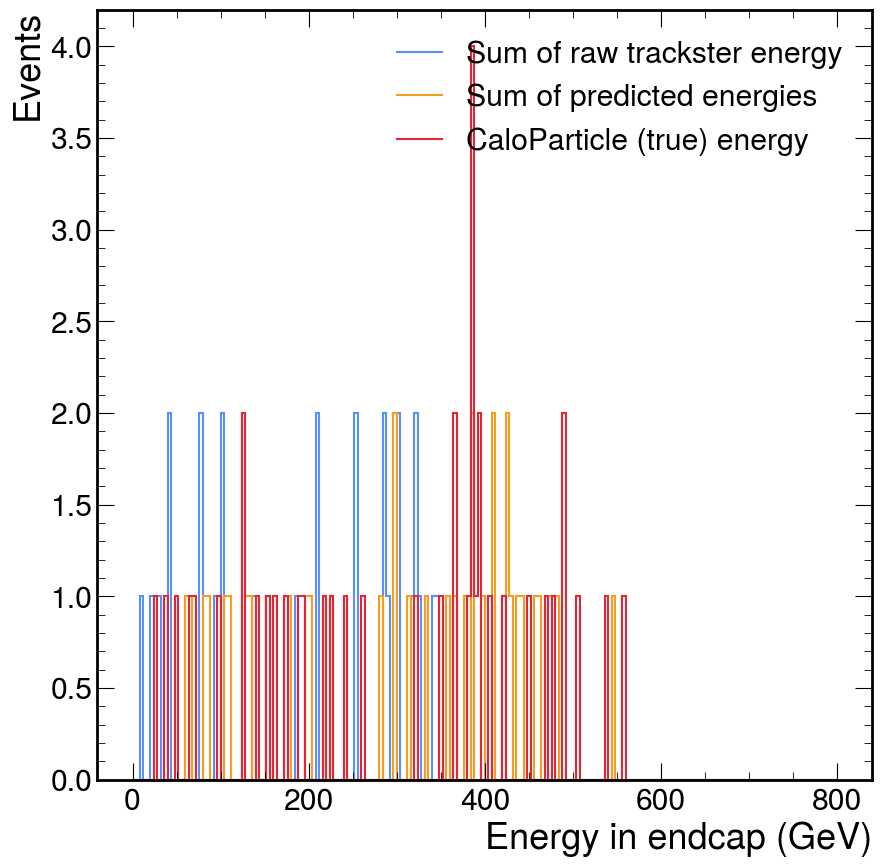

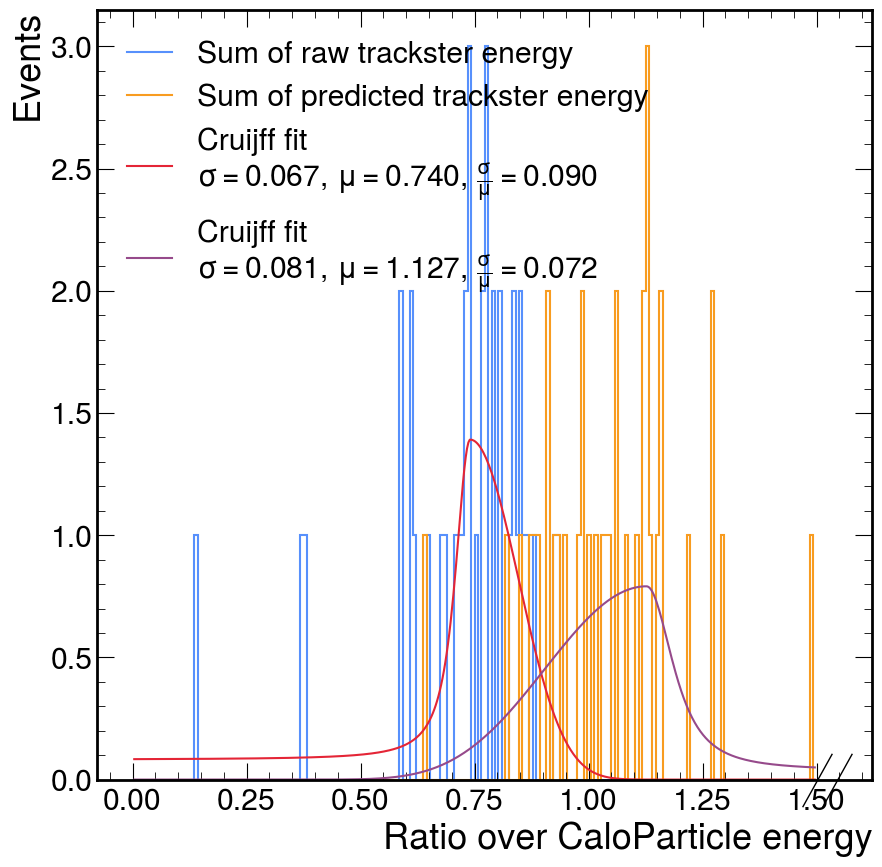

In [10]:
# Validation

#TODO: sensible output
path="data/"
doFullValidation(X_test, y_test, predictions,path)